In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = "Latin Modern Roman"
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['mathtext.fontset'] = "cm"
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean
import datetime
import pandas as pd
from dask.diagnostics import ProgressBar
from scipy.ndimage import gaussian_filter
import xesmf as xe
import scipy
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

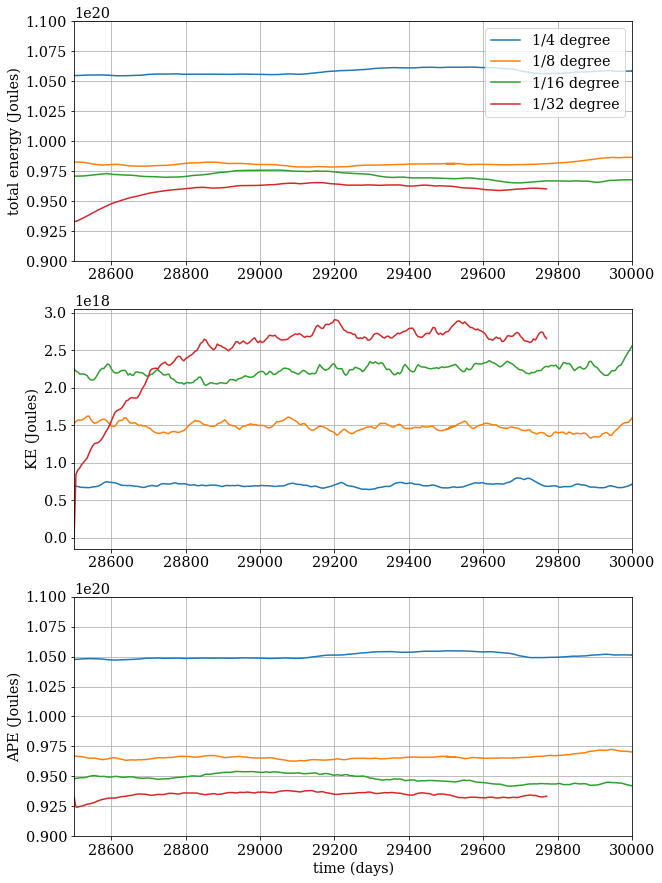

In [3]:
run = [20,26,28,33]
min_T = 28500
plt.figure(figsize=(10,15))
for i in range(len(run)):
    plt.subplot(3,1,1)
    os = xr.open_dataset('run%i/ocean.stats.nc' % run[i], decode_times=False)
    time = os.Time
    if i==0:
        time = os.Time
        En = os.En
        KE = os.KE.sum(axis=1)
        APE = os.APE.sum(axis=1)
    if i==1:
        max_t_0 = 8000
        time = os.Time[1:max_t_0]
        En = os.En[1:max_t_0]
        KE = os.KE[1:max_t_0].sum(axis=1)
        APE = os.APE[1:max_t_0].sum(axis=1)
        En[3050:4000] = None
        KE[3050:4000] = None
        APE[3050:4000] = None
        En[7050:7500] = None
        KE[7050:7500] = None
        APE[7050:7500] = None
    if i == 2:
        max_t = 6977
        time = os.Time[1:max_t] 
        En = os.En[1:max_t]
        En[1000:1004] = None
        KE = os.KE[1:max_t].sum(axis=1)
        KE[1000:1004] = None
        APE = os.APE[1:max_t].sum(axis=1)
        APE[1000:1004] = None
    if i == 3:
        time = os.Time + min_T
        En = os.En
        KE = os.KE.sum(axis=1)
        APE = os.APE.sum(axis=1)
    plt.plot(time,En)
    plt.xlim((min_T, 30000))
    plt.ylim((0.9e20,1.1e20))
    plt.ylabel('total energy (Joules)')
    plt.gca().legend(('1/4 degree', '1/8 degree', '1/16 degree','1/32 degree')) 
    plt.grid('on')
    plt.subplot(3,1,2)
    plt.plot(time,KE)
    plt.ylabel('KE (Joules)')
    plt.xlim((min_T, 30000))
    plt.grid('on')
    plt.subplot(3,1,3)
    plt.plot(time,APE)
    plt.ylabel('APE (Joules)')
    plt.xlabel('time (days)')
    plt.xlim((min_T, 30000))
    plt.ylim((0.9e20,1.1e20))
    plt.grid('on')

plt.savefig('Energy_spin_up.png', dpi=200,bbox_inches='tight',pad_inches=0)

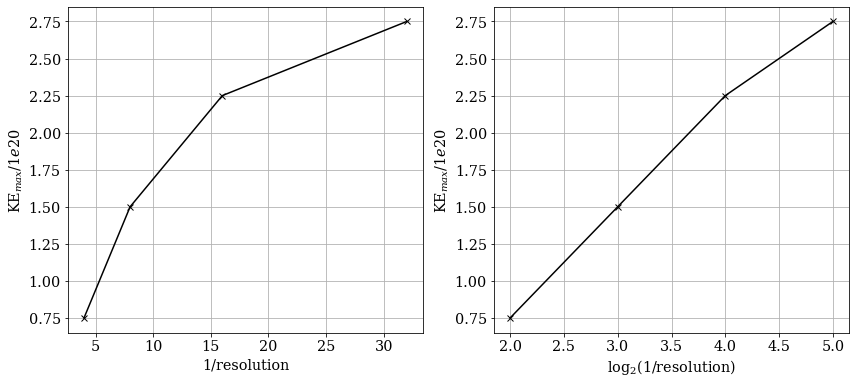

In [4]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot([4,8,16,32],[0.75,1.5,2.25,2.75],'kx-')
plt.xlabel('1/resolution')
plt.ylabel(r'KE$_{max}/1e20$ ')
plt.grid()

plt.subplot(1,2,2)
plt.plot([2,3,4,5],[0.75,1.5,2.25,2.75],'kx-')
plt.xlabel(r'log$_2$(1/resolution)')
plt.ylabel(r'KE$_{max}/1e20$ ')
plt.grid()

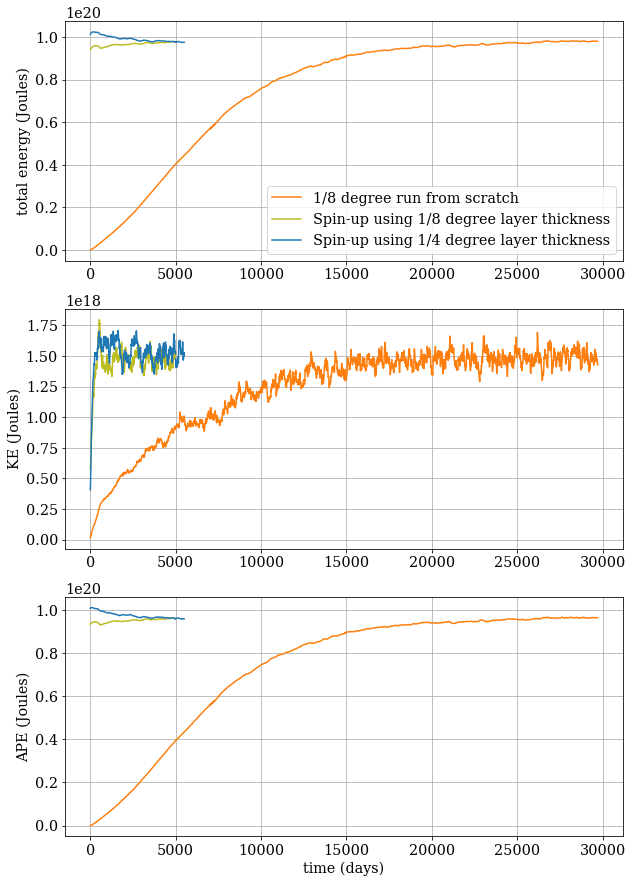

In [5]:
run = [26,30,31]
color = ['#ff7f0e','#bcbd22','#1f77b4']
max_t = 1500
min_T = 0
max_t_0 = 6977
plt.figure(figsize=(10,15))
for i in range(len(run)):
    plt.subplot(3,1,1)
    os = xr.open_dataset('run%i/ocean.stats.nc' % run[i], decode_times=False)
    time = os.Time
    if i==0:
        time = os.Time[1:max_t_0]
        En = os.En[1:max_t_0]
        KE = os.KE[1:max_t_0].sum(axis=1)
        APE = os.APE[1:max_t_0].sum(axis=1)
        En[3050:4000] = None
        KE[3050:4000] = None
        APE[3050:4000] = None
        En[7050:7500] = None
        KE[7050:7500] = None
        APE[7050:7500] = None
    if i >= 1:
        time = os.Time[1:max_t] + min_T
        En = os.En[1:max_t]
        En[1000:1004] = None
        KE = os.KE[1:max_t].sum(axis=1)
        KE[1000:1004] = None
        APE = os.APE[1:max_t].sum(axis=1)
        APE[1000:1004] = None
    plt.plot(time,En,color[i])
    plt.ylabel('total energy (Joules)')
    plt.gca().legend(('1/8 degree run from scratch', 'Spin-up using 1/8 degree layer thickness', 'Spin-up using 1/4 degree layer thickness')) 
    plt.grid()
    plt.subplot(3,1,2)
    plt.plot(time,KE,color[i])
    plt.ylabel('KE (Joules)')
    plt.grid()
    plt.subplot(3,1,3)
    plt.plot(time,APE,color[i])
    plt.ylabel('APE (Joules)')
    plt.xlabel('time (days)')
    plt.grid()
    

plt.savefig('Energy_spin_up_1_8_degree.png', dpi=200,bbox_inches='tight',pad_inches=0)

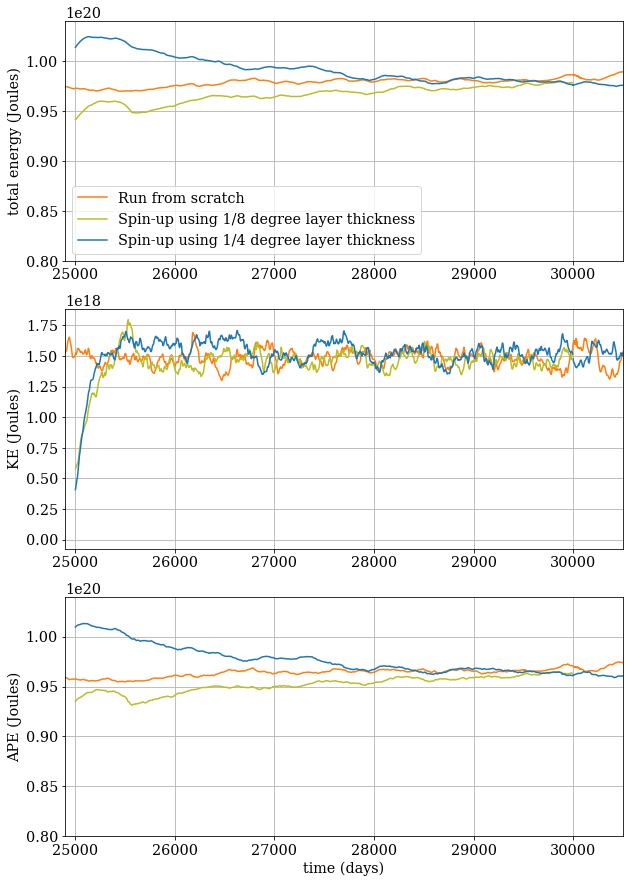

In [6]:
run = [26,30,31]
color = ['#ff7f0e','#bcbd22','#1f77b4']
# run = [28,32]
max_t = 1500
min_T = 25000
max_t_0 = 8000
plt.figure(figsize=(10,15))
for i in range(len(run)):
    plt.subplot(3,1,1)
    os = xr.open_dataset('run%i/ocean.stats.nc' % run[i], decode_times=False)
    time = os.Time
    if i==0:
        time = os.Time[1:max_t_0]
        En = os.En[1:max_t_0]
        KE = os.KE[1:max_t_0].sum(axis=1)
        APE = os.APE[1:max_t_0].sum(axis=1)
        En[3050:4000] = None
        KE[3050:4000] = None
        APE[3050:4000] = None
        En[7050:7500] = None
        KE[7050:7500] = None
        APE[7050:7500] = None
        
    if i >= 1:
        time = os.Time[1:max_t] + min_T
        En = os.En[1:max_t]
        En[1000:1004] = None
        KE = os.KE[1:max_t].sum(axis=1)
        KE[1000:1004] = None
        APE = os.APE[1:max_t].sum(axis=1)
        APE[1000:1004] = None
    plt.plot(time,En,color[i])
    plt.grid()
    plt.xlim((min_T-100,min_T+5500))
    plt.ylabel('total energy (Joules)')
    plt.ylim((0.8e20,1.04e20))
    plt.gca().legend(('Run from scratch', 'Spin-up using 1/8 degree layer thickness', 'Spin-up using 1/4 degree layer thickness')) 
    plt.subplot(3,1,2)
    plt.plot(time,KE,color[i])
    plt.grid()
    plt.xlim((min_T-100,min_T+5500))
    plt.ylabel('KE (Joules)')
    plt.subplot(3,1,3)
    plt.plot(time,APE,color[i])
    plt.grid()
    plt.xlim((min_T-100,min_T+5500))
    plt.ylim((0.8e20,1.04e20))
    plt.ylabel('APE (Joules)')
    plt.xlabel('time (days)')

plt.savefig('Energy_spin_up_1_8_degree_zoom.png', dpi=200,bbox_inches='tight',pad_inches=0)

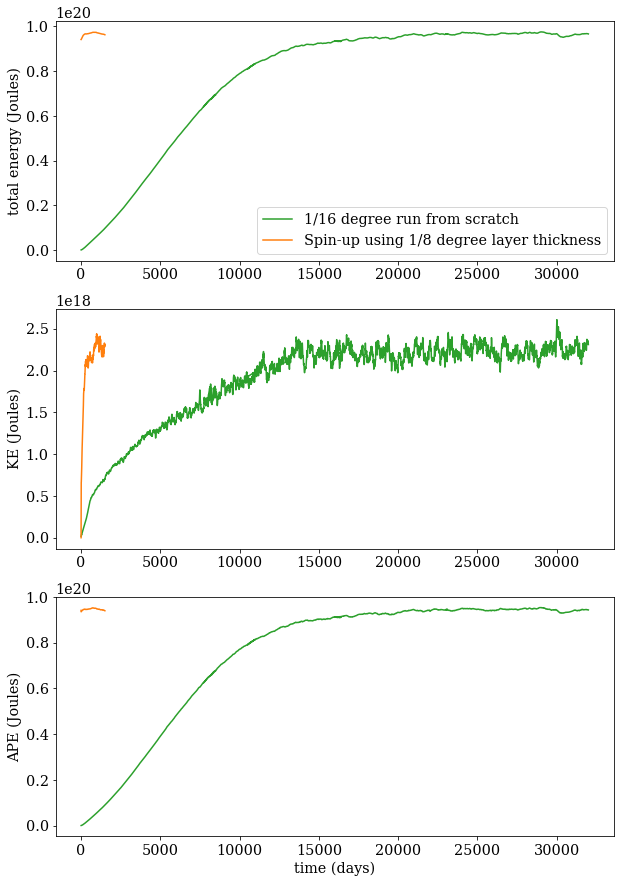

In [7]:
run = [28,32]
color = ['#2ca02c','#ff7f0e']
max_t = 1500
min_T = 0
max_t_0 = 6977
plt.figure(figsize=(10,15))
for i in range(len(run)):
    plt.subplot(3,1,1)
    os = xr.open_dataset('run%i/ocean.stats.nc' % run[i], decode_times=False)
    time = os.Time
    if i == 0:
        max_t = 6977
        time = os.Time[1:max_t] 
        En = os.En[1:max_t]
        En[1700:1900] = None
        KE = os.KE[1:max_t].sum(axis=1)
        KE[1700:1900] = None
        APE = os.APE[1:max_t].sum(axis=1)
        APE[1700:1900] = None
    if i == 1:
        time = os.Time
        En = os.En
        KE = os.KE.sum(axis=1)
        APE = os.APE.sum(axis=1)
    plt.plot(time,En,color[i])
    plt.ylabel('total energy (Joules)')
    plt.gca().legend(('1/16 degree run from scratch', 'Spin-up using 1/8 degree layer thickness')) 
    plt.grid()
    plt.subplot(3,1,2)
    plt.plot(time,KE,color[i])
    plt.ylabel('KE (Joules)')
    plt.grid()
    plt.subplot(3,1,3)
    plt.plot(time,APE,color[i])
    plt.ylabel('APE (Joules)')
    plt.xlabel('time (days)')
    plt.grid()
    

plt.savefig('Energy_spin_up_1_16_degree.png', dpi=200,bbox_inches='tight',pad_inches=0)

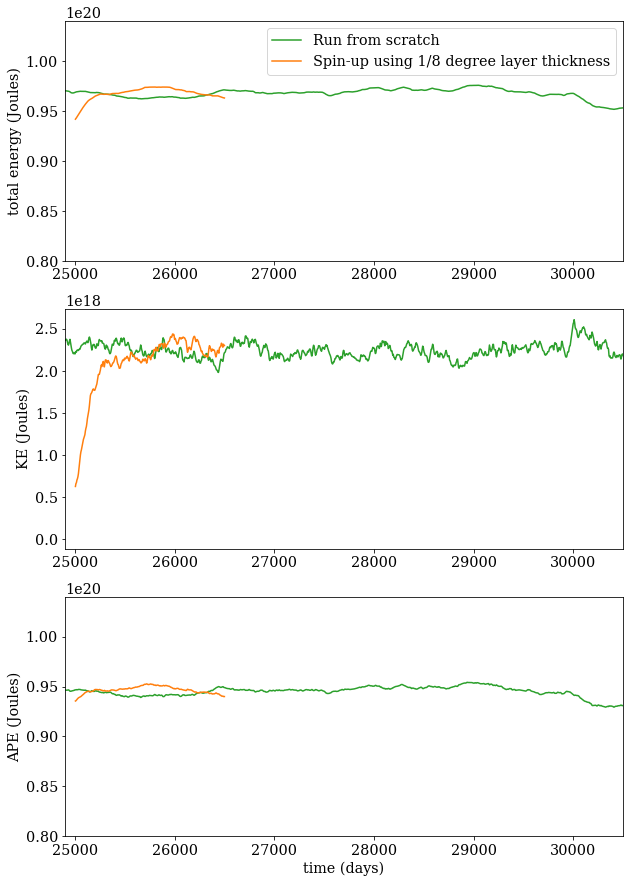

In [8]:
run = [28,32]
color = ['#2ca02c','#ff7f0e']
max_t = 1500
min_T = 25000
max_t_0 = 8000
plt.figure(figsize=(10,15))
for i in range(len(run)):
    plt.subplot(3,1,1)
    os = xr.open_dataset('run%i/ocean.stats.nc' % run[i], decode_times=False)
    time = os.Time
    if i==0:
        max_t = 6977
        time = os.Time[1:max_t] 
        En = os.En[1:max_t]
        En[1000:1004] = None
        KE = os.KE[1:max_t].sum(axis=1)
        KE[1000:1004] = None
        APE = os.APE[1:max_t].sum(axis=1)
        APE[1000:1004] = None
    if i >= 1:
        time = os.Time[1:max_t] + min_T
        En = os.En[1:max_t]
        KE = os.KE[1:max_t].sum(axis=1)
        APE = os.APE[1:max_t].sum(axis=1)
    plt.plot(time,En,color[i])
    plt.xlim((min_T-100,min_T+5500))
    plt.ylabel('total energy (Joules)')
    plt.ylim((0.8e20,1.04e20))
    plt.grid()
    plt.gca().legend(('Run from scratch', 'Spin-up using 1/8 degree layer thickness')) 
    plt.subplot(3,1,2)
    plt.plot(time,KE,color[i])
    plt.xlim((min_T-100,min_T+5500))
    plt.ylabel('KE (Joules)')
    plt.grid()
    plt.subplot(3,1,3)
    plt.plot(time,APE,color[i])
    plt.xlim((min_T-100,min_T+5500))
    plt.ylim((0.8e20,1.04e20))
    plt.ylabel('APE (Joules)')
    plt.xlabel('time (days)')
    plt.grid()

plt.savefig('Energy_spin_up_1_16_degree_zoom.png', dpi=200,bbox_inches='tight',pad_inches=0)

In [7]:
th1 = xr.open_dataset('run29/THICKNESS_FILE.nc', decode_times=False)
st2 = xr.open_dataset('run30/static.nc', decode_times=False)
th3 = xr.open_dataset('run30/snapshots_00020005.nc', decode_times=False)
th3 = th3.sel(time=slice(19000,20005))
th3['eta'] = th3['e']
th3 = th3.drop(['e'])
xh2 = st2.xh
yh2 = st2.yh

In [8]:
xh_a = th1.xh.values
xh_a[0] = th3.xh[0]-1/8
xh_a[-1] = th3.xh[-1]+1/8
yh_a = th1.yh.values
yh_a[0] = th3.yh[0]-1/8
yh_a[-1] = th3.yh[-1]+1/8
th1.assign_coords(xh_a=("xh_a", xh_a))
th1.assign_coords(yh_a=("yh_a", yh_a))
zi = th1.zi
time = th1.time
yh1 = th1.yh

eta_a = th1.eta

me = xr.DataArray(eta_a, coords={'xh_a': xh_a, 'yh_a': yh_a, 
                                'zi': zi, 'time': time},
             dims=['time','zi','yh_a', 'xh_a'])

th1['eta_a'] = eta_a
th1 = th1.drop(['eta_a'])
# xh_a = np.arange(-th1.xh[0]-0.25*10, th1.xh[-1]+0.25*10, 0.25)
# th1.assign_coords(xh_a=("xh_a", xh_a))
# th1.Dataset({'eta_a': (('time','zi','yh','xh_a'), eta_a)})

In [9]:
th1

<xarray.Dataset>
Dimensions:  (time: 1, xh: 240, yh: 560, zi: 16)
Coordinates:
  * xh       (xh) float64 -0.0625 0.375 0.625 0.875 ... 59.12 59.38 59.62 60.06
  * yh       (yh) float64 -70.06 -69.62 -69.38 -69.12 ... 69.38 69.62 70.06
  * zi       (zi) float64 1.022e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time     (time) float64 2.000e+04
Data variables:
    eta      (time, zi, yh, xh) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    filename:          snapshots_00020005.nc
    title:             NeverWorld2
    associated_files:  area_t: static.nc
    grid_type:         regular
    grid_tile:         N/A

In [10]:
# xh_a = np.arange(-th1.xh[0]-0.25*10, th1.xh[-1]+0.25*10, 0.25)
# th1.assign_coords(xh_a=("xh_a", xh_a))
# th1.Dataset({'eta_a': (('time','zi','yh','xh_a'), eta_a)})

In [11]:
th1_na = th1.fillna(0)
th1_na
# th2['eta'] = scipy.interpolate.RectBivariateSpline(yh2, xh2, th1_na['eta'])
# th2 = th1.interp_like(th3)
# th2 = th1.resample_like(th3, kind='bilinear', dims=('yh', 'xh'))

<xarray.Dataset>
Dimensions:  (time: 1, xh: 240, yh: 560, zi: 16)
Coordinates:
  * xh       (xh) float64 -0.0625 0.375 0.625 0.875 ... 59.12 59.38 59.62 60.06
  * yh       (yh) float64 -70.06 -69.62 -69.38 -69.12 ... 69.38 69.62 70.06
  * zi       (zi) float64 1.022e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time     (time) float64 2.000e+04
Data variables:
    eta      (time, zi, yh, xh) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    filename:          snapshots_00020005.nc
    title:             NeverWorld2
    associated_files:  area_t: static.nc
    grid_type:         regular
    grid_tile:         N/A

In [12]:
th2 = th1_na.interp(xh=xh2, yh=yh2)
th3

<xarray.Dataset>
Dimensions:  (time: 1, xh: 480, yh: 1120, zi: 16)
Coordinates:
  * xh       (xh) float64 0.0625 0.1875 0.3125 0.4375 ... 59.69 59.81 59.94
  * yh       (yh) float64 -69.94 -69.81 -69.69 -69.56 ... 69.69 69.81 69.94
  * zi       (zi) float64 1.022e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time     (time) float64 2.000e+04
Data variables:
    eta      (time, zi, yh, xh) float64 ...
Attributes:
    filename:          snapshots_00020005.nc
    title:             NeverWorld2
    associated_files:  area_t: static.nc
    grid_type:         regular
    grid_tile:         N/A

In [9]:
th2 = th2.fillna(0)
# th2 = th2.where(th3.notnull())

In [10]:
th2.to_netcdf('run31/THICKNESS_FILE.nc')

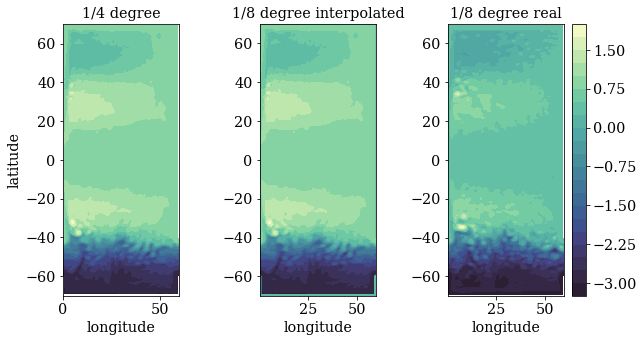

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.contourf(th1.xh,th1.yh,th1.eta[0,0], cmap=cmocean.cm.deep_r,levels=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('1/4 degree')
plt.subplot(1,3,2)
plt.contourf(th2.xh,th2.yh,th2.eta[0,0], cmap=cmocean.cm.deep_r,levels=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('longitude')
plt.title('1/8 degree interpolated')
plt.subplot(1,3,3)
plt.contourf(th3.xh,th3.yh,th3.eta[0,0], cmap=cmocean.cm.deep_r,levels=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('longitude')
plt.colorbar()
plt.title('1/8 degree real')

plt.savefig('layer_thickness.png', dpi=200,bbox_inches='tight',pad_inches=0)

In [86]:
xi = 0
yi = 0
print(yh2[yi],th1.eta[0,-1,yi,xi],th2.eta[0,-1,yi,xi],th3.eta[0,-1,yi,xi])

<xarray.DataArray 'yh' ()>
array(-69.9375)
Coordinates:
    yh       float64 -69.94
Attributes:
    long_name:       h point nominal latitude
    units:           degrees_north
    cartesian_axis:  Y <xarray.DataArray 'eta' ()>
array(nan)
Coordinates:
    xh       float64 -0.0625
    yh       float64 -69.88
    zi       float64 1.028e+03
    time     float64 2.000e+04
Attributes:
    long_name:      Interface Height Relative to Mean Sea Level
    units:          m
    cell_methods:   area:mean zi:point yh:mean xh:mean time: point
    cell_measures:  area: area_t <xarray.DataArray 'eta' ()>
array(nan)
Coordinates:
    zi       float64 1.028e+03
    time     float64 2.000e+04
    xh       float64 0.0625
    yh       float64 -69.94
Attributes:
    long_name:      Interface Height Relative to Mean Sea Level
    units:          m
    cell_methods:   area:mean zi:point yh:mean xh:mean time: point
    cell_measures:  area: area_t <xarray.DataArray 'eta' ()>
array(nan)
Coordinates:
    xh     

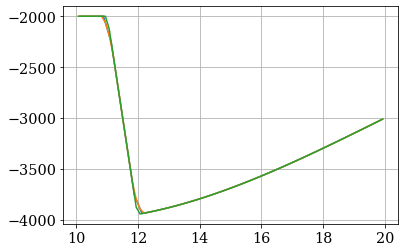

In [87]:
lon_i = 10
lon_f = 20
lat = -50


plt.plot(th1.xh.sel(xh=slice(lon_i,lon_f)),th1.eta[0,-1].sel(yh=lat, method="nearest").sel(xh=slice(lon_i,lon_f)))
plt.plot(th2.xh.sel(xh=slice(lon_i,lon_f)),th2.eta[0,-1].sel(yh=lat, method="nearest").sel(xh=slice(lon_i,lon_f)))
plt.plot(th3.xh.sel(xh=slice(lon_i,lon_f)),th3.eta[0,-1].sel(yh=lat, method="nearest").sel(xh=slice(lon_i,lon_f)))
plt.grid()

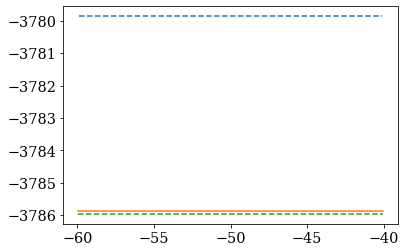

In [88]:
lat_i = -60
lat_f = -40
lon = 14


plt.plot(th1.yh.sel(yh=slice(lat_i,lat_f)),th1.eta[0,-1].sel(xh=lon, method="nearest").sel(yh=slice(lat_i,lat_f)),'--')
plt.plot(th2.yh.sel(yh=slice(lat_i,lat_f)),th2.eta[0,-1].sel(xh=lon, method="nearest").sel(yh=slice(lat_i,lat_f)),'-')
plt.plot(th3.yh.sel(yh=slice(lat_i,lat_f)),th3.eta[0,-1].sel(xh=lon, method="nearest").sel(yh=slice(lat_i,lat_f)),'--')

# 1/32 degree interp

In [15]:
th1 = xr.open_dataset('run28/snapshots_00020005.nc', decode_times=False)
st2 = xr.open_dataset('run33/static.nc', decode_times=False)
th1['eta'] = th1['e']
th1 = th1.drop(['e'])
xh2 = st2.xh
yh2 = st2.yh

In [16]:
st2

<xarray.Dataset>
Dimensions:      (time: 1, xh: 1920, xq: 1921, yh: 4480, yq: 4481)
Coordinates:
  * xh           (xh) float64 0.01562 0.04688 0.07812 ... 59.92 59.95 59.98
  * yh           (yh) float64 -69.98 -69.95 -69.92 -69.89 ... 69.92 69.95 69.98
  * time         (time) float64 0.0
  * xq           (xq) float64 0.0 0.03125 0.0625 0.09375 ... 59.94 59.97 60.0
  * yq           (yq) float64 -70.0 -69.97 -69.94 -69.91 ... 69.94 69.97 70.0
Data variables:
    geolon       (yh, xh) float64 ...
    geolat       (yh, xh) float64 ...
    geolon_c     (yq, xq) float32 ...
    geolat_c     (yq, xq) float32 ...
    geolon_u     (yh, xq) float32 ...
    geolat_u     (yh, xq) float32 ...
    geolon_v     (yq, xh) float32 ...
    geolat_v     (yq, xh) float32 ...
    area_t       (yh, xh) float64 ...
    area_u       (yh, xq) float64 ...
    area_v       (yq, xh) float64 ...
    dyCu         (yh, xq) float64 ...
    dxCv         (yq, xh) float64 ...
    dxCu         (yh, xq) float64 ...
    dyCv         (yq, xh) float64 ...
    depth_ocean  (yh, xh) float32 ...
    wet          (yh, xh) float64 ...
    wet_c        (yq, xq) float32 ...
    wet_u        (yh, xq) float32 ...
    wet_v        (yq, xh) float32 ...
    Coriolis     (yq, xq) float32 ...
Attributes:
    filename:   static.nc
    title:      NeverWorld2
    grid_type:  regular
    grid_tile:  N/A

In [17]:
xh_a = th1.xh.values
xh_a[0] = xh2[0]-1/8
xh_a[-1] = xh2[-1]+1/8
yh_a = th1.yh.values
yh_a[0] = yh2[0]-1/8
yh_a[-1] = yh2[-1]+1/8
th1.assign_coords(xh_a=("xh_a", xh_a))
th1.assign_coords(yh_a=("yh_a", yh_a))
zi = th1.zi
time = th1.time
yh1 = th1.yh

eta_a = th1.eta

me = xr.DataArray(eta_a, coords={'xh_a': xh_a, 'yh_a': yh_a, 
                                'zi': zi, 'time': time},
             dims=['time','zi','yh_a', 'xh_a'])

th1['eta_a'] = eta_a
th1 = th1.drop(['eta_a'])
# xh_a = np.arange(-th1.xh[0]-0.25*10, th1.xh[-1]+0.25*10, 0.25)
# th1.assign_coords(xh_a=("xh_a", xh_a))
# th1.Dataset({'eta_a': (('time','zi','yh','xh_a'), eta_a)})

In [18]:
th1_na = th1.fillna(0)
th2 = th1_na.interp(xh=xh2, yh=yh2)
th2 = th2.fillna(0)
th2.to_netcdf('run33/THICKNESS_FILE.nc')

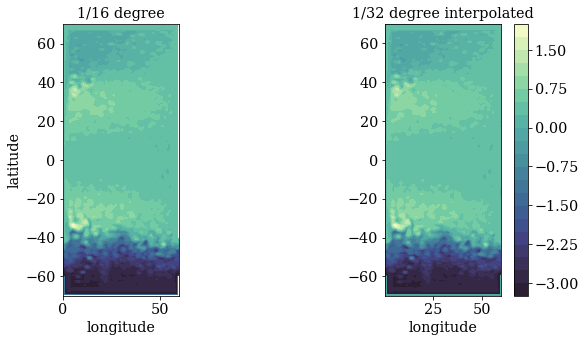

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.contourf(th1.xh,th1.yh,th1.eta[0,0], cmap=cmocean.cm.deep_r,levels=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('1/16 degree')
plt.subplot(1,2,2)
plt.contourf(th2.xh,th2.yh,th2.eta[0,0], cmap=cmocean.cm.deep_r,levels=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('longitude')
plt.title('1/32 degree interpolated')
plt.colorbar()

plt.savefig('layer_thickness.png', dpi=200,bbox_inches='tight',pad_inches=0)

# Different analysis

In [16]:
run = [20,26,28,33]

sn1 = xr.open_dataset('run%i/snapshots_00030005.nc' % run[0], decode_times=False)
sn2 = xr.open_dataset('run%i/snapshots_00030005.nc' % run[1], decode_times=False)
sn3 = xr.open_dataset('run%i/snapshots_00030005.nc' % run[2], decode_times=False)

st1 = xr.open_dataset('run%i/static.nc' % run[0], decode_times=False)
st2 = xr.open_dataset('run%i/static.nc' % run[1], decode_times=False)
st3 = xr.open_dataset('run%i/static.nc' % run[2], decode_times=False)
st4 = xr.open_dataset('run%i/static.nc' % run[3], decode_times=False)

In [17]:
xh1 = st1.xh
yh1 = st1.yh
xh2 = st2.xh
yh2 = st2.yh
xh3 = st3.xh
yh3 = st3.yh
xh4 = st4.xh
yh4 = st4.yh

In [18]:
# sn1 = xr.open_dataset('run%i/averages_00030002.nc' % run[0], decode_times=False)
# sn2 = xr.open_dataset('run%i/averages_00030002.nc' % run[1], decode_times=False)
# sn3 = xr.open_dataset('run%i/averages_00030002.nc' % run[2], decode_times=False)

In [19]:
plots = len(run)

KE1 = sn1.KE*sn1.h/st1.depth_ocean
KE1 = KE1.mean(axis=1)

In [20]:
KE2 = sn2.KE*sn2.h/st2.depth_ocean
KE2 = KE2.mean(axis=1)

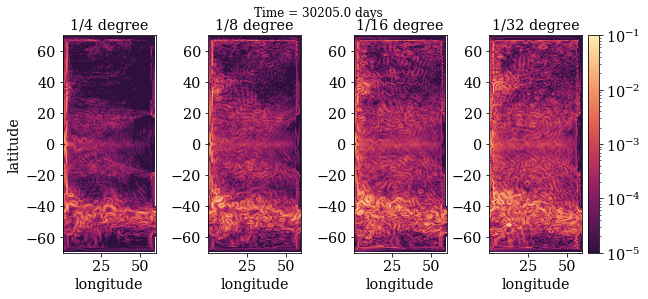

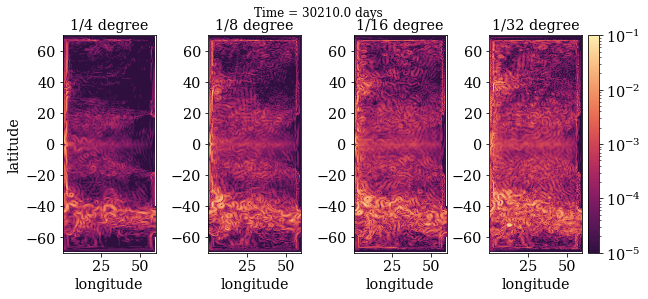

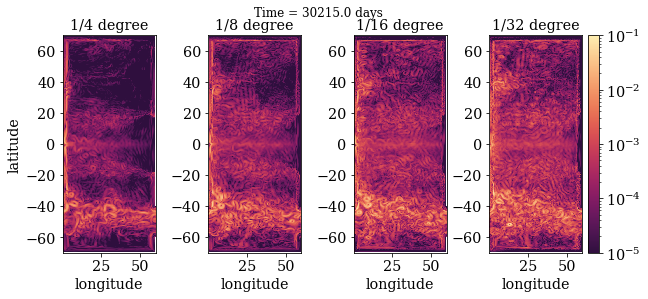

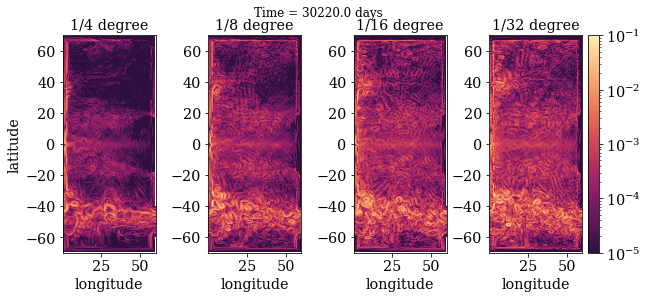

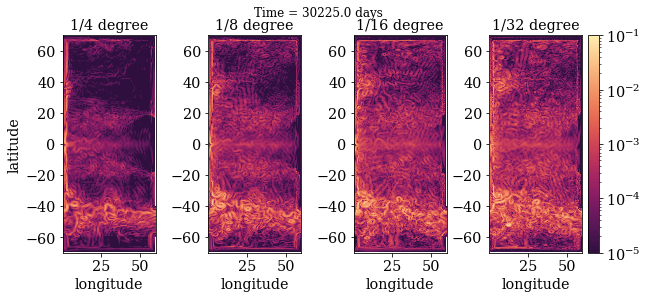

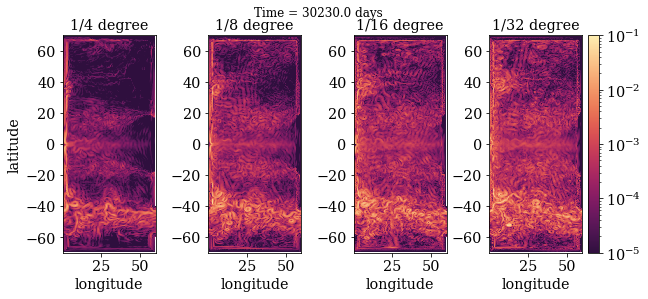

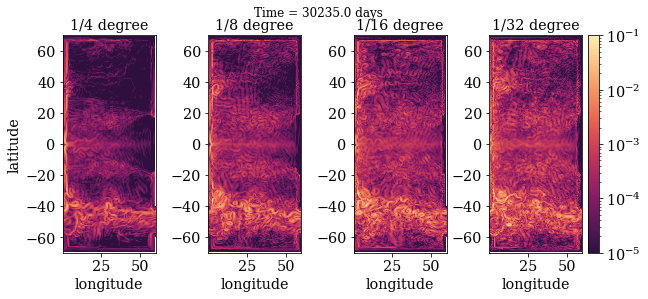

In [ ]:
sn4_time = [1005,1105,1205,1305,1405]
i_start = [0,20,40,60,80]
i_end = [20,40,60,80,100]

sn4_time = [1105,1205,1305]
i_start = [40,60,80]
i_end = [60,80,100]
for j in range(1): # range(len(sn4_time)) to generate multiple images for video
    sn4 = xr.open_dataset('run%i/snapshots_0000%i.nc' % (run[3],sn4_time[j]), decode_times=False)
    time = sn1.time
    vmin = 0.00001
    vmax = 0.1
    for i in range(i_start[j],i_end[j]):  
        plt.figure(figsize=(10,4))
        KE3 = sn3.KE[i]*sn3.h[i]/st3.depth_ocean
        KE3 = KE3.mean(axis=0)
        KE4 = sn4.KE[i-i_start[j]]*sn4.h[i-i_start[j]]/st4.depth_ocean
        KE4 = KE4.mean(axis=0)
        plt.suptitle('Time = %.1f days' %time[i])
        plt.subplot(1,plots,1)
        plt.pcolormesh(xh1,yh1,KE1[i], norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmocean.cm.matter_r)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.clim(vmin, vmax)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.title('1/4 degree')
        plt.subplot(1,plots,2)
        plt.pcolormesh(xh2,yh2,KE2[i], norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmocean.cm.matter_r)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.clim(vmin, vmax)
        plt.xlabel('longitude')
        plt.title('1/8 degree')
        plt.subplot(1,plots,3)
        plt.pcolormesh(xh3,yh3,KE3, norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmocean.cm.matter_r)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.clim(vmin, vmax)
        plt.xlabel('longitude')
        plt.title('1/16 degree')
        plt.subplot(1,plots,4)
        plt.pcolormesh(xh4,yh4,KE4, norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmocean.cm.matter_r)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.clim(vmin, vmax)
        plt.xlabel('longitude')
        plt.title('1/32 degree')
        plt.colorbar()
#         plt.colorbar(format='%.4f')
#         save_name = 'KE9/fig_'+'{0:06}'.format(int(time[i]))+ '.png'
#         plt.savefig(save_name, dpi=200,bbox_inches='tight',pad_inches=0)
#         plt.close()

In [22]:
np.nanmax(KE3)

0.09232733298772841

In [24]:
time = sn1.time
vmin = 0.00001
vmax = 0.1
for i in range(len(time)):  
    plt.figure(figsize=(10,4))
    KE3 = sn3.KE.values[i].astype(float)*sn3.h.values[i].astype(float)/st3.depth_ocean.values.astype(float)
    KE3 = KE3.mean(axis=0)
    plt.suptitle('Time = %.1f days' %time[i])
    plt.subplot(1,plots,1)
    plt.pcolormesh(xh1,yh1,KE1[i], norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmocean.cm.matter_r)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.clim(vmin, vmax)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('1/4 degree')
    plt.subplot(1,plots,2)
    plt.pcolormesh(xh2,yh2,KE2[i], norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmocean.cm.matter_r)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.clim(vmin, vmax)
    plt.xlabel('longitude')
    plt.title('1/8 degree')
    plt.subplot(1,plots,3)
    plt.pcolormesh(xh3,yh3,KE3, norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmocean.cm.matter_r)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.clim(vmin, vmax)
    plt.xlabel('longitude')
    plt.title('1/16 degree')
    plt.colorbar(format='%.4f')
    save_name = 'KE5/fig_'+'{0:06}'.format(int(time[i]))+ '.png'
    plt.savefig(save_name, dpi=200,bbox_inches='tight',pad_inches=0)
    plt.close()

In [25]:
time = sn1.time
vmin = 0
vmax = 0.04
for i in range(len(time)):  
    plt.figure(figsize=(10,4))
    KE3 = sn3.KE.values[i].astype(float)*sn3.h.values[i].astype(float)/st3.depth_ocean.values.astype(float)
    KE3 = KE3.mean(axis=0)
    plt.suptitle('Time = %.1f days' %time[i])
    plt.subplot(1,plots,1)
    plt.pcolormesh(xh1,yh1,KE1[i], cmap=cmocean.cm.matter_r)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.clim(vmin, vmax)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('1/4 degree')
    plt.subplot(1,plots,2)
    plt.pcolormesh(xh2,yh2,KE2[i], cmap=cmocean.cm.matter_r)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.clim(vmin, vmax)
    plt.xlabel('longitude')
    plt.title('1/8 degree')
    plt.subplot(1,plots,3)
    plt.pcolormesh(xh3,yh3,KE3, cmap=cmocean.cm.matter_r)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.clim(vmin, vmax)
    plt.xlabel('longitude')
    plt.title('1/16 degree')
    plt.colorbar(format='%.4f')
    save_name = 'KE6/fig_'+'{0:06}'.format(int(time[i]))+ '.png'
    plt.savefig(save_name, dpi=200,bbox_inches='tight',pad_inches=0)
    plt.close()

# Spin-up analysis

In [ ]:
run = [26,31]

sn1 = xr.open_dataset('run%i/snapshots_00030005.nc' % run[0], decode_times=False)
sn2 = xr.open_mfdataset('run%i/snapshots_00000*.nc' % run[1], decode_times=False)

st1 = xr.open_dataset('run%i/static.nc' % run[0], decode_times=False)
st2 = xr.open_dataset('run%i/static.nc' % run[1], decode_times=False)

In [116]:
xh1 = st1.xh
yh1 = st1.yh
xh2 = st2.xh
yh2 = st2.yh

In [132]:
time = sn2.time
ssh2 = sn2.e[:,0]
vmin = np.nanmin(ssh2)
vmax = np.nanmax(ssh2) 
ci = np.arange(-3.8,round(vmax)+0.2,0.2)
for i in range(len(time)):  
    plt.figure(figsize=(5,4))
    plt.suptitle('Time = %.1f days' %time[i])
    plt.contourf(xh2,yh2,ssh2[i], cmap=cmocean.cm.deep_r,levels = ci)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.colorbar()
    save_name = 'SSH4/fig_'+'{0:06}'.format(int(time[i]))+ '.png'
    plt.savefig(save_name, dpi=200,bbox_inches='tight',pad_inches=0)
    plt.close()

In [133]:
sn2 = xr.open_dataset('run%i/snapshots_00005005.nc' % run[1], decode_times=False)

In [121]:
plots = len(run)

KE1 = sn1.KE.values.astype(float)*sn1.h.values.astype(float)/st1.depth_ocean.values.astype(float)
KE1 = KE1.mean(axis=1)

In [122]:
KE2 = sn2.KE.values.astype(float)*sn2.h.values.astype(float)/st2.depth_ocean.values.astype(float)
KE2 = KE2.mean(axis=1)

In [134]:
time1 = sn1.time
time2 = sn2.time
vmin = 0.00001
vmax = 0.1
for i in range(len(time1)):  
    plt.figure(figsize=(6,4))
    plt.subplot(1,plots,1)
    plt.pcolormesh(xh1,yh1,KE1[i], norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmocean.cm.matter_r)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.clim(vmin, vmax)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('Time = %.1f days' %time1[i])
    plt.subplot(1,plots,2)
    plt.pcolormesh(xh2,yh2,KE2[i], norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmocean.cm.matter_r)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.clim(vmin, vmax)
    plt.xlabel('longitude')
    plt.title('Time = %.1f days' %time2[i])
    plt.colorbar(format='%.4f')
    save_name = 'KE8/fig_'+'{0:06}'.format(int(time[i]))+ '.png'
    plt.savefig(save_name, dpi=200,bbox_inches='tight',pad_inches=0)
    plt.close()

/glade/u/apps/dav/opt/python/3.7.5/gnu/8.3.0/pkg-library/20200417/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
